### Gather Tutorial

This tutorial is a simple way to introduce you to the Gather class. Also, it tells you about some helpful attributes and  methods. <br>
You disclosed the Gather and Survey classes dependence. For that reason, I highly recommend to examining the [Survey Tutorial](#link) first. <br>
After studying the Gather Tutorial, you could create the Gather object, know about its structure, and base seismic data processing.

Tutorial reading takes N minutes. /// говорят эта строчка не нужна, но во многих материалах обсуждается, что данная строчка нужна, чтобы человек понимал сколько он потратит времени и наличие такой строчка считается хорошим тоном. удалить

### Content

[Introduction](#Introduction) <br>
[Creating Gather](#Creating-Gather) <br>
[Attributes](#Attributes) <br>
[General Methods](#General-Methods)<br>
[Normalization Methods](#Normalization-Methods) <br>
[Muting Methods](#Muting-Methods) <br>
[Conclusion](#Conclusion) <br>

In [38]:
import sys # delete after finish
sys.path.append('..') # delete after finish

import matplotlib.pyplot as plt

from seismicpro import Survey

### Introduction

We use Survey class to make a concise image of the SEG-Y file. This image doesn't contain any trace data, only headers.
For trace data extraction, we use the Gather class.

Gather class copy needful information about SEG-Y file from Survey class, such as headers, and extract the trace data from the SEG-Y file. Gather extract the trace data for indicated `header_index` values only.

Relation Survey and Gather better understand with the picture below.<br>
We create the Survey with one trace header as `header_index` and three trace headers as `header_cols`. These headers could be the same for the different traces.
When we create Gather, we choose a value of the `header_index`. Gather takes all traces with the same `header_index` value (from 5 to 12 on the picture). Gather loads the headers from the parent Survey and trace data from the SEG-Y file.

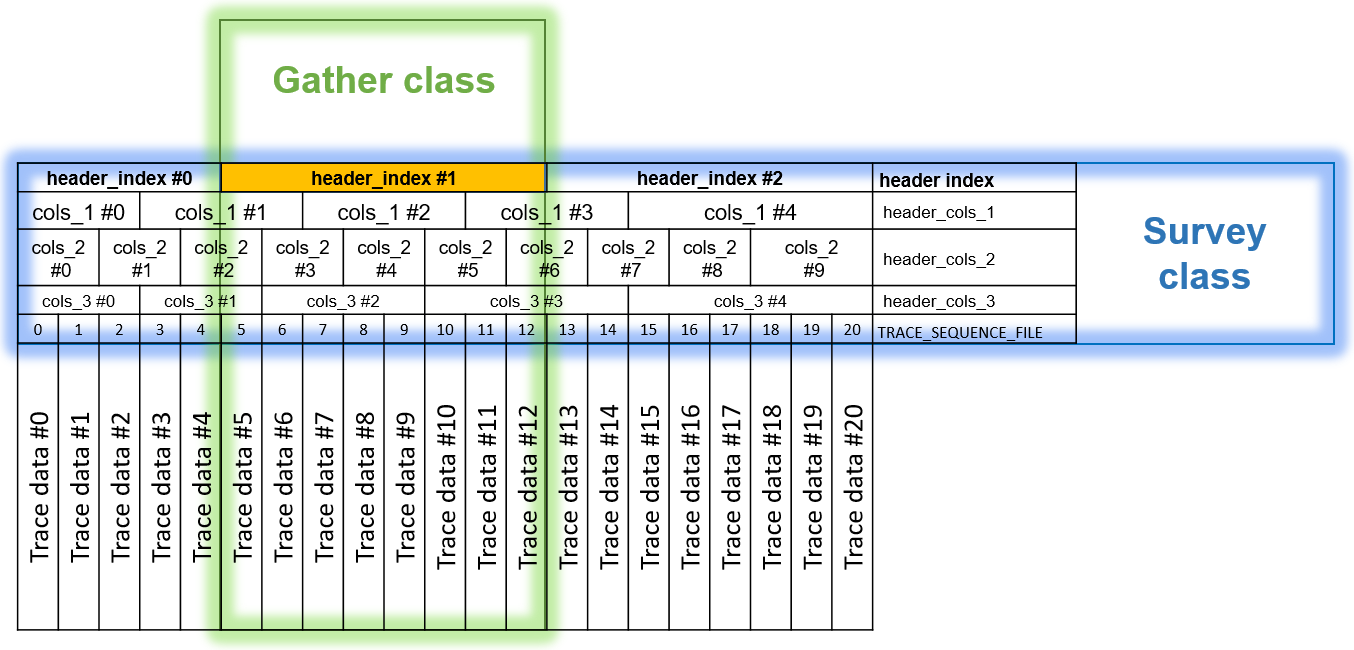

Why don't we load trace data in the Survey class? <br>
SEG-Y files are usually very-very huge. A better way is to work with the meaningful chunk that Gather class makes. 

### Creating Gather
You will get to know two methods of creating a Gather class example and learn about Gather structure.

We need to create the Survey class first. All the same as in the Survey tutorial.

In [2]:
sgy_path = './data/small_survey.sgy'
header_cols = ["TraceNumber", "offset", 'CDP'] # headers that we'll use during this tutorials
survey = Survey(sgy_path, header_index='FieldRecord', header_cols=header_cols)

We specified `header_cols` as a list of the trace headers. `header_index` is specified with a list of trace headers also.

#### get_gather()

To create the Gather with `get_gather` method we need specify `header_index`'s value. Gather extract trace data with indicated trace header value only. <br>

At begins, check the unique value of `header_index` the Survey has.

In [3]:
survey.headers.index.drop_duplicates()

Int64Index([111916, 111917, 111918, 111919, 111920], dtype='int64', name='FieldRecord')

Now choose one of them and specify it in `get_gather` method. 

In [4]:
gather = survey.get_gather(index=111918)

What's happened? `get_gather` load all traces with 'FieldRecord' (Survey's `header_index`) equal to 111918 (specified in `get_gather`).

/// не слишком ли подробно? Мне кажется нужно расписывать, т.к. результат зависит от параметров разных классов.

Now see information about created gather with `info()` method.

In [5]:
gather.info()


Parent survey path:          ./data/small_survey.sgy
Parent survey name:          small_survey

Number of traces:            1728
Trace length:                3000 samples
Sample rate:                 2.0 ms
Times range:                 [0.0 ms, 5998.0 ms]
Offsets range:               [79 m, 4914 m]

Index name(s):               FieldRecord
Index value:                 111918
Gather sorting:              None

Gather statistics:
Number of dead traces:       3
mean | std:                        0.00 | 0.51      
 min | max:                      -30.30 | 21.94     
 q01 | q99:                       -1.59 | 1.60      



/// я специально подробно расписываю с цифрами, чтобы у читателя сложилось представление что какие цифры означают и как они называются. Тоже касается Сюрвей туториала, в котором Дима сократил данный блок. Данный блок в Газере получился больше, но я все еще в него верю.

We see that Gather created from the Survey named 'small_survey' and based on SEG-Y files located at './data/small_survey.sgy'.

Gather object contain 1728 traces with 3000 samples, each collecting with 2 ms intervals. Data collected at times range from 0 ms to 5998 ms. <br>
All 1728 traces have an offset range from 79 to 4914 meters.

Traces in `Gather` indexed by `FieldRecord` and have the FieldRecord value is 111918 only. Gather not sorted. <br>

Gather statistics shows common information about all trace data loaded by the Gather and auto-calculated when `info()` called.
Gather has 3 dead traces. It's trace with the same value only.

<b> Notes: </b>
When Gather is created from the Survey with limits, traces will be loaded within specified limits.

#### samle_gather

`sample_gather` randomly choose one of `header_index` value and create the Gather containing all traces where `header_index` is equal the selected value.

In [6]:
gather = survey.sample_gather()
gather.info() # maybe remove this string is good idea


Parent survey path:          ./data/small_survey.sgy
Parent survey name:          small_survey

Number of traces:            1728
Trace length:                3000 samples
Sample rate:                 2.0 ms
Times range:                 [0.0 ms, 5998.0 ms]
Offsets range:               [79 m, 4914 m]

Index name(s):               FieldRecord
Index value:                 111919
Gather sorting:              None

Gather statistics:
Number of dead traces:       3
mean | std:                       -0.00 | 0.60      
 min | max:                     -197.41 | 196.99    
 q01 | q99:                       -1.76 | 1.75      



You could see a difference between Gathers created with `get_gather` and `sample_gather` methods. The key diff is `Index value`.

I hope you could freely create the Gather now. /// не является ли такая фраза в туториале фамильярностью и дурным тоном? Я все еще в поиске стилистических границ.

### Attributes

Let discuss useful attributes of the Gather class.

<b>`headers`</b> - `pandas.Dataframe` containing the trace headers we specified when creating the `Survey`. In contrast with `Survey`, the `Gather` contains headers with included trace only.

In [7]:
gather.headers

,TraceNumber,CDP,offset,TRACE_SEQUENCE_FILE
FieldRecord,,,,
111919,1656,2128768,79,1
111919,1,2041181,4914,1727
111919,1722,2128834,3275,1158
111919,1591,2128703,3275,1157
111919,239,2049231,3273,1156
...,...,...,...,...
111919,635,2073063,2276,571
111919,1702,2128814,2275,570
111919,1611,2128723,2275,569


`headers` Dataframe indexed by FieldRecord. Indexing of headers specified when Survey created and can't be changed via the Gather.

<b>`data`</b> - `numpy.array` containing the trace data of all traces in Gather.

In [8]:
gather.data

array([[ 9.4282581e-04, -1.5990627e-03, -1.6264895e-03, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  2.6388265e-09, -9.0567880e-08, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  2.6900079e-07, -1.1736693e-06, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00, -5.8086904e-09,  4.5848985e-08, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 1.7145830e-06, -1.1712002e-05, -6.8356503e-06, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)

You could check the shape of the `data` array and make certain that the shape of array is (`Number of traces`, `Trace length`)

In [9]:
gather.data.shape

(1728, 3000)

<b>`samples`</b> - an array of record timestamps, ms

In [10]:
gather.samples

array([0.000e+00, 2.000e+00, 4.000e+00, ..., 5.994e+03, 5.996e+03,
       5.998e+03], dtype=float32)

<b>`sample_rate` </b> - sample interval for each trace, ms

In [11]:
gather.sample_rate

2.0

We learned about the main attributes of the Gather class.

`mask` - пропущено в данном туториале, т.к. использует в задачах пикировки, которая не прописывается в данном туториале.

### General Methods

We'll talk about common methods in this block.

<b>Notes:</b> All methods works inplace.

#### <i>plot </i>

`plot()` method use for visualization trace data information.

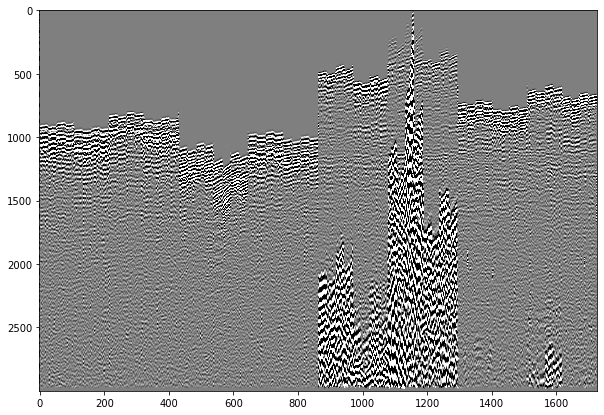

In [12]:
gather.plot()

The Y-axis of the plot corresponds to samples and the X-axis to trace numbers. <br>
Gray color map means that the bigger value is black, lower is white.

///
Метод простой, поэтому я скуп на слова.<br>
Что хотелось бы видеть: Шкалу значений справа от графика, выбор colormap, возможность указания по осям других значений. например перевести samples из штук в ms.

объяснили, что это все будет в новом пуллреквесте. ждем сейсмикбро 2.1

#### <i>sort </i>

Sort the traces in the Gather by the `header_cols` value.<br>
`sort` works in the ascending order always.

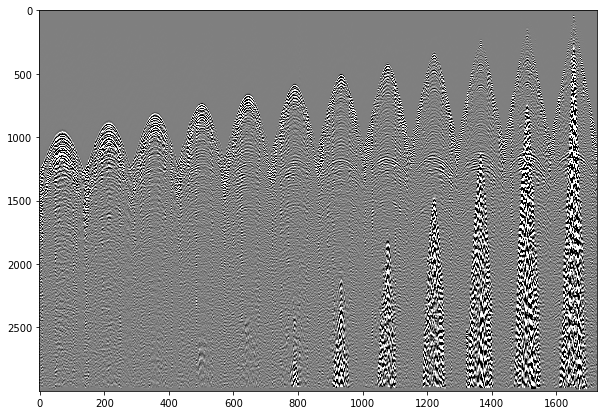

In [13]:
gather = survey.sample_gather().sort(by='CDP') # будем добавлять сортировку по убыванию? стоит ли засорять issue такоё херней?
gather.plot()

`Gather`' attribute `sort_by` now shows the header used in sorting.

In [29]:
gather.sort_by

'offset'

#### <i>copy </i>

Make the `Gather` copy.

Most the `Gather`'s methods work inplace and change the trace data. Good practice to keep Gather's data safe is making a copy and work with the copied Gather.

Now we have the `Gather` example which we sorted by CDP in the sort block. We will make a copy of this gather and sort the original Gather by `offset`.

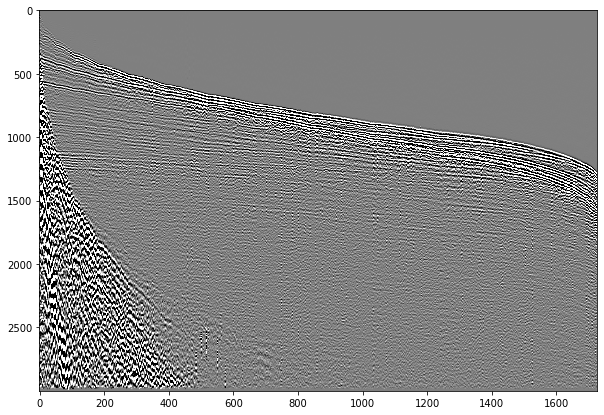

In [15]:
gather_copy = gather.copy()
gather.sort(by='offset')
gather.plot()

Now plot the copied Gather and shows that copied Gather is still sorted by `CDP`.

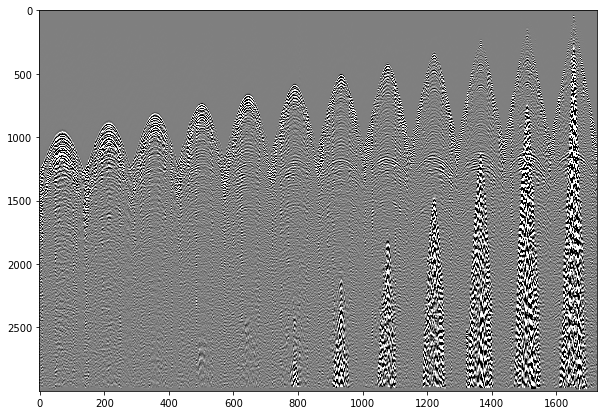

In [16]:
gather_copy.plot()

In the future, we will often use copy methods. I hope you will too.

#### <i>dump </i>

Save the `Gather` as a file in SEG-Y format on the disk. <br>

In [17]:
gather.dump(path='./data/', name='test_gather')

`path` specified directory for saved files and `name` of the SEG-Y file

By default, the saved file will contain the trace headers from `gather.headers` only. Suppose you could save other trace headers from parent SEG-Y with `copy_header=True`.<br>
`gather.dump(path='./data/', name='test_gather', copy_header=True)`

### Normalization Methods

We'll discuss data normalization methods in this block. These methods are helpful to prepare the data before using it in a ML models.<br>

Normalization methods work inplace. Use the copy method to save the original data unchanged.

Normalization  methods have three option which define with `tracewise` and `use_global` flags.
1. The normalization parameters calcs by the separate trace with `tracewise=True` and `use_global=False`. This mode is used by default and no need to speciefied any params.
2. The normalization parameters takes from global statistics of the Survey, and need to calculate the Survey's statistic first with `tracewise=False` abd`use_global=True`.
3. The normalization parameters calcs by all Gather's trace data with `tracewise=False` and `use_global=False`.

/// normalization parameters = mean, std, min. max

#### <i>scale_standard </i>

Normalize the gather data by moving mean to zero and variance to 1.

In [36]:
gather_scaled = gather.copy()

gather_scaled.scale_standard()
print(f'Mean of the scaled trace data is {gather_scaled.data.mean():.2f}') # add abs() to remove the minus sign
print(f'Standart deviation of the scaled trace data is {gather_scaled.data.std():.2f}')

Mean of the scaled trace data is -0.00
Standart deviation of the scaled trace data is 1.00


Normalization methods work with all trace data. I use histograms for data vizualization.<br>
This plot shows unnormalize data histograms.

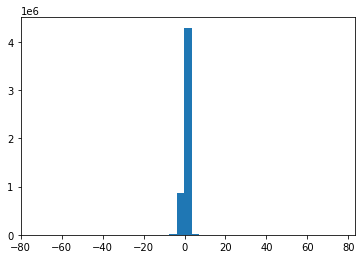

In [35]:
_ = plt.hist(gather.data.ravel(), bins=41)

The scond plot shows normalize data histogram.

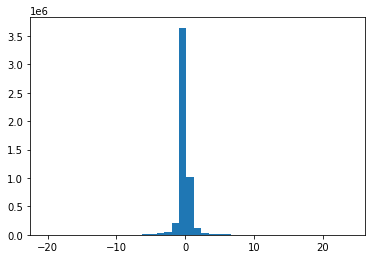

In [20]:
_ = plt.hist(gather_scaled.data.ravel(), bins=41)

You could check two histogtam and compare data distribution.You could check two histogram and compare data distribution.

Example of how to use global statistics.     /// нужен ли он тут?

Calculating statistics for survey small_survey:   0%|          | 0/8640 [00:00<?, ?it/s]

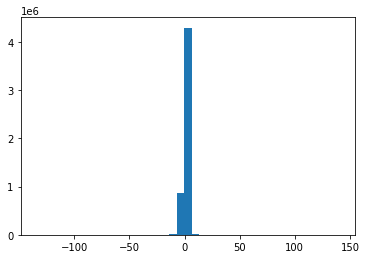

In [21]:
survey.collect_stats()
gather_scaled = gather.copy()
gather_scaled.scale_standard(use_global=True)
_ = plt.hist(gather_scaled.data.ravel(), bins=41)

#### <i>scale_maxabs </i>

Normalize the gather data by the maximum absolute value.

In [22]:
gather_scaled = gather.copy()

gather_scaled.scale_maxabs()
print(f'Absolute minimum of the scaled trace data is {gather_scaled.data.min():.2f}')
print(f'Absolute maximum of the scaled trace data is {gather_scaled.data.max():.2f}')

Absolute minimum of the scaled trace data is -1.00
Absolute maximum of the scaled trace data is 1.00


Plotting histogram of the normalized data to better understand using method.

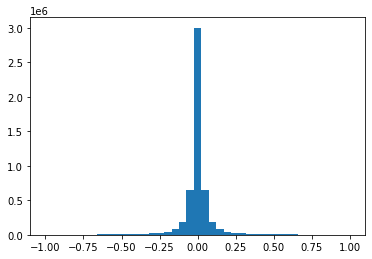

In [23]:
_ = plt.hist(gather_scaled.data.ravel(), bins=41)

Data outliers have strong effect to the `scale_maxabs` normalization. We may change it with `q_min` and `q_max` parameters. <br>
`q_min` and `q_max` are quantiles used as minimum and maximum instead total minimum and maximum. 

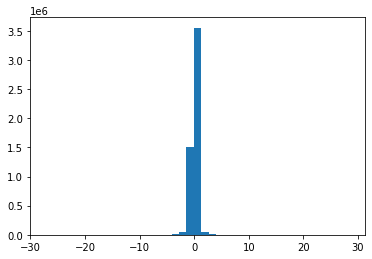

In [24]:
gather_scaled = gather.copy()
gather_scaled.scale_maxabs(q_min=0.02, q_max=0.98)
_ = plt.hist(gather_scaled.data.ravel(), bins=41)

The trace data outliers make the histogram is narrow. # подумать над синонимом к narrow

We could fix it with the `clip` parameters. 

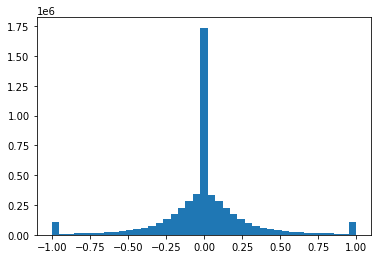

In [25]:
gather_scaled = gather.copy()
gather_scaled.scale_maxabs(q_min=0.02, q_max=0.98, clip=True)
_ = plt.hist(gather_scaled.data.ravel(), bins=41)

Data smaller than -1 becomes -1, and data larger than 1 becomes 1. So we could see a little pick at -1 and 1. <br>
Compare the last histogram with pure `scale_maxabs()` normalization histogram.

/// мне не нравится, что гистограмма с квантилями и клипом не помещается на один экран с гистограммой maxabs без параметров.
как сделать так, чтобы наглядность была и последовательность изложения не нарушалась?

#### <i>scale_minmax </i>

Scale trace data to a [0, 1] interval.

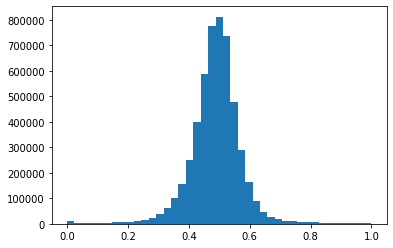

In [26]:
gather_scaled = gather.copy()

gather_scaled.scale_minmax()
_ = plt.hist(gather_scaled.data.ravel(), bins=41)

`scale_minmax()` also support using quantile to reduce data outliers effects.

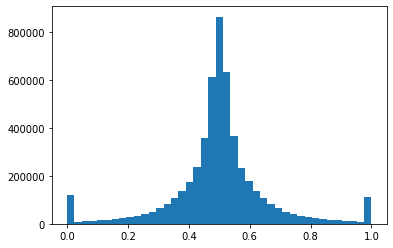

In [37]:
gather_scaled = gather.copy()
gather_scaled.scale_minmax(q_min=0.02, q_max=0.98, clip=True)
_ = plt.hist(gather_scaled.data.ravel(), bins=41)

<b>`get_quantile()`</b> method return the specified quantile for all trace `gather.get_quantile(0.01)` <br>
or quantile by each trace `gather.get_quantile(0.01, tracewise=True)`

<b>`get_quantile()`</b> is useful when you want to makes own normalization method. 

### Muting Methods

Muting used to remove noised trace data by nullification part of trace.

`Gather` realize the muting with `create_muter()` and `mute()` methods. We create the Muter object with `create_muter()` and implement the Muter object to the Gather with `mute()`.

`create_muter()` have three muting modes. Muter could be created by points, from a file, and by fisrt breaks. <br>
Consider in detail creating the Muter in the 'point' mode.

For example, try to mute the trace data placed higher on a seismogram than a zigzag line. At begin, we should use 'point' mode and pass to `create_muter()` coordinates of the breakpoints. <br>

We specified four breakpoints in the samples below. Coordinates of these points are designate by offset and times separately.

/// я хотел расписать, но тут проще написать код и нарисовать сейсмограмму.
я сделал пример, который показывает как работает ломанная, возможно тут надо использовать близкий к практике пример.
вопрос. какая ломаная делает геофизически потребный мьютинг?

In [27]:
gather_muted = gather.copy()
offsets = [127, 1500, 2500, 4949]
times = [500, 2000, 2000, 6000]
points = {'offsets': offsets, 'times': times}
muter = gather_muted.create_muter('points', **points)

When Muter is created, just use it and watch what happens.

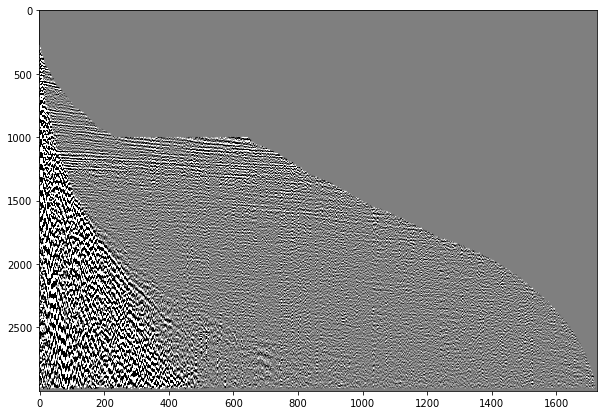

In [28]:
gather_muted.mute(muter)
gather_muted.plot()

There are a bit confused to pick point by this plot - samples on the Y-axis and sequence number of traces on the X-axis.
We could divide times by samples rate to convert times to samples. Convert the number of traces isn't simple case.

/// наверно надо удалить этот блок? или всё таки объяснить почему мьютим ломанной, а получаем на графике кривую?

We show only one mode of muting in this tutorial. To get more information about `first_breaks` and `file` modes, read SeismicPro [documentation].

### Conclusion

This tutorial:
- explained the purpose of the `Gather` class and showed a common using way.
- discussed `Gather`'s attributes with the containing results.
- showed `Gather`'s methods with visualizing its results.

To learn more please refer to the [documentation]().
If you still have any questions you could free contact with our team by [...].

[Go to top](#Gather-Tutorial)